## Getting the dataframe ready for Machine Learning

## 1. Data Preprocessing and EDA

In [1]:
# Jupyter Notebook with Matplotlib Inline
%matplotlib notebook

# Import required modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import math

In [2]:
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

height has been deprecated.



In [3]:
# Read the cleaned datasets
train = pd.read_csv("train.csv", delimiter=',') 
test = pd.read_csv("test.csv", delimiter=',')

In [4]:
# Combining two dataframes into 1
z = pd.concat([train, test])

# Creating a copy of the 'train' dataframe to work on 
df = z.copy(deep = True)

In [5]:
# Creating df_transformations exclusively for transformations 
df_transformations = df.copy(deep = True)

## 2. Data Preperation

After the EDA, here are the transformations that will be applied to the data:

2.1 Data Transformation

    1. 'job', 'education' and 'month' -- Consolidating these variables on Percentage of positive and negative responses.
    2. 'age' -- Binning the high outliers (> 75) and low outliers (< 23) into a single bin respectively; and bins of 4/5 for values with in 24 and 75.
    3. 'day' -- Replace day with 'weekday_1', 'weekday_2' and 'weekend' categories.
    4. 'duration' -- Create two dataframes (one with 'duration' column another without). This is covered at the end of this section.
    5. 'marital' variable -- Come back to this step while using Machine Leanring for variable or feature importance


2.2 Treating Outliers
    
    1. Applying Upper and Lower bounds to 'duration' and 'employees' variable  <br>
    2. Applying 90 percentiles and 5 percentiles for the lower and upper outliers  <br>
    3. Apply Logarithmic transformations to invalid outliers (Not to the outliers but to all the entries in the numeric columns). <br>

<u>Note:</u> `marital` variable - Come back to this step while using Machine Leanring for variable or feature importance

## 2.1 Data Transformation

### Transformation 1 : 'job', 'education' and 'month' 

Consolidating 'job', 'education' and 'month' variables (Percentage of positive and negative responses)

<img src="Category Consolidation.png">

In [6]:
# Consolidate 'job', 'education' and 'month' variables based on percentage of positive and negative responses.
df_transformations['job'].replace(['blue-collar', 'services', 'entrepreneur', 'housemaid', 'self-employed', 'technician', 
                  'management', 'unknown', 'admin.', 'unemployed', 'retired', 'student'],
                   ['j1l4', 'j1l4', 'j1l4', 'j1l3', 'j1l3', 'j1l3', 'j1l3', 'j1l2', 'j1l2', 'j1l2', 'j1l1', 'j1l1'], 
                   inplace=True)

df_transformations['education'].replace(['basic.9y','basic.6y','basic.4y','high.school','professional.course','university.degree','unknown','illiterate'],
                      ['e1l4','e1l4','e1l3','e1l3','e1l3','e1l2','e1l2','e1l1'], 
                      inplace=True)

df_transformations['month'].replace(['may','jul','nov','aug','jun','apr','oct','sep','dec','mar'],
                      ['m1l3','m1l3','m1l3','m1l3','m1l3','m1l2','m1l1','m1l1','m1l1','m1l1'], 
                      inplace=True)

### Transformation 2 :  'age' Variable

### <center> Version - A </center>

<div class="alert alert-warning">
Binning the high outliers (> 75) and low outliers (< 23) into a single bin respectively; and bins of 4/5 for values with in 24 and 75
</div>

In [7]:
# Single bin[0-20]....bins of 4 [24-60]....bins of 5 [60-75]....single bin [75-100] 
def final_test(a): 
    if(a>0 and a<=24):
        return "Cat 1"
    elif (a>24 and a<=31):
        return "Cat 2"
    elif (a>31 and a<=35):
        return "Cat 3"
    elif (a>35 and a<=41):
        return "Cat 4"
    elif (a>41 and a<=49):
        return "Cat 5"
    elif (a>49 and a<=60):
        return "Cat 6"
    elif (a>60 and a<=100):
        return "Cat 7"

In [8]:
df_transformations['age_cat'] = df.apply(lambda row: final_test(row['age']), axis=1)

In [9]:
# Drop 'age' column
df_transformations.drop('age', 1, inplace = True)

### <center> Version - B </center>

<div class="alert alert-info">
Binning the ages into a 'young_adult', 'adult' and 'senior' using `'qcut'`.
</div>

In [17]:
age_groups = ['young_adult', 'adult', 'senior']

In [19]:
z['age_group'] = pd.qcut(df['age'], 3, labels = age_groups)

<div class="alert alert-danger">
</div>
### Transformation 3: Merging 'marital' and 'age'

In [34]:
pd.crosstab(z.marital, z.age)

age,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,91,92,94,95,98
marital,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
divorced,0,0,0,0,0,0,0,3,11,9,13,15,51,73,121,102,106,109,141,115,134,135,119,113,143,135,88,120,155,121,123,112,120,101,105,119,107,98,98,107,96,78,72,35,5,3,4,4,3,7,5,5,3,9,2,7,6,9,6,3,7,8,0,10,8,6,4,3,3,2,1,13,1,0,1,0,1,0
married,0,0,0,1,7,13,25,67,121,153,209,296,437,604,722,745,852,828,865,878,722,708,784,625,683,648,630,556,626,587,534,611,502,539,478,465,442,409,382,464,379,359,290,171,54,45,39,44,27,42,17,18,22,31,35,18,21,17,14,25,11,14,11,14,7,7,9,2,9,5,0,3,0,1,2,1,0,2
single,2,22,36,53,83,96,148,289,349,388,466,488,671,681,730,643,525,418,418,384,315,290,231,182,180,135,129,143,98,87,83,74,60,55,34,43,35,29,32,18,45,18,14,9,3,1,0,0,1,4,0,4,0,0,4,2,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
unknown,0,0,0,0,0,0,0,0,1,0,1,0,3,4,6,5,3,5,3,1,4,2,0,1,1,0,0,0,2,0,0,0,3,3,0,2,1,1,2,1,2,2,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [62]:
z['age_marital'] = z.apply(lambda x: x['age_group'] + ' & ' + x['marital'], axis = 1)

In [64]:
z['age_marital'].value_counts()

senior & married          7805
adult & married           7099
young_adult & single      6088
young_adult & married     5080
adult & single            2407
senior & divorced         1796
adult & divorced          1243
senior & single            757
young_adult & divorced     613
young_adult & unknown       28
senior & unknown            22
adult & unknown             12
Name: age_marital, dtype: int64

### Transformation 3 - 'day' variable 

Replace day with 'weekday_1', 'weekday_2' and 'weekend' categories.

In [10]:
# Replace day with 'weekday_1', 'weekday_2' and 'weekend' categories.
df_transformations['day'].replace(['sum', 'sat', 'mon', 'tue', 'wed', 'thu', 'fri'],
                      ['weekend', 'weekend', 'weekday_1', 'weekday_1', 'weekday_1', 'weekday_2', 'weekday_2'], 
                      inplace=True)

### Transformation 4 - 'duration' Variable
<u>Important note:</u> this attribute highly affects the output target (e.g., if duration=0 then y='no'). 

Yet, the duration is not known before a call is performed. 
Also, after the end of the call y is obviously known. 
Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

 <u>Notes</u>: del df['column_name']
 
 Advantage of drop over del is that drop allows you to drop multiple columns at once, 
 perform the operation inplace or not, and also delete records along any axis (especially useful for a 3-D matrix

<center> <b> More on this at the end of this section </center>

### Transformation 5 - 'Marital' variable

All classes in this variable are similarly distributed.

<u>Note:</u>  Come back to this step while using Machine Leanring for variable or feature importance

In [11]:
# All categories are almost similarly distributed (83%-90% for NOs)............
pd.crosstab(z.marital, z.y, normalize='index')

y,no,yes
marital,,
divorced,0.896791,0.103209
married,0.898427,0.101573
single,0.859959,0.140041
unknown,0.850000,0.150000


## 2.2 Treating Outliers 

1. Replace valid outliers with logarithmic transformation
2. Replace invalid outliers (human-error) with 90th percentile or upper bounds OR exclude the record from the dataframe. 

IQR - https://www.youtube.com/watch?v=dNHGVLXBTgI

In [12]:
df_outliers = df.copy(deep = True)
df_log = df.copy(deep = True)
df_outliers_log = df.copy(deep = True)

In [13]:
df_transformations_outliers = df_transformations.copy(deep = True)
df_transformations_outliers_log = df_transformations.copy(deep = True)

#### (a) Applying Upper and Lower bounds to 'duration' and 'employees' variable 

In [14]:
# Upper and Lower bounds for 'duration' and 'employee' column
df_outliers['duration'] = df_outliers['duration'].apply(lambda x: int(math.floor(x / 10.0)) * 10 if(x%10<5) else int(math.ceil(x / 10.0)) * 10 )
df_outliers['employees'] = df_outliers['employees'].apply(lambda x: int(math.floor(x / 10.0)) * 10 if(x%10<5) else int(math.ceil(x / 10.0)) * 10 ) 

df_outliers_log['duration'] = df_outliers_log['duration'].apply(lambda x: int(math.floor(x / 10.0)) * 10 if(x%10<5) else int(math.ceil(x / 10.0)) * 10 )
df_outliers_log['employees'] = df_outliers_log['employees'].apply(lambda x: int(math.floor(x / 10.0)) * 10 if(x%10<5) else int(math.ceil(x / 10.0)) * 10 ) 

In [15]:
df_transformations_outliers_log['duration'] = df_transformations_outliers_log['duration'].apply(lambda x: int(math.floor(x / 10.0)) * 10 if(x%10<5) else int(math.ceil(x / 10.0)) * 10 )
df_transformations_outliers_log['employees'] = df_transformations_outliers_log['employees'].apply(lambda x: int(math.floor(x / 10.0)) * 10 if(x%10<5) else int(math.ceil(x / 10.0)) * 10 ) 

#### (b) Applying 90 percentiles and 10 percentiles for the lower and upper outliers 

In [16]:
uq = 0.95
lq = 0.05

In [17]:
colz = ['duration', 'dcontacts', 'pdays', 'evr', 'cpi', 'cci', 'euribor', 'employees']

In [18]:
for col in colz:
    df_outliers[col] = df_outliers[col].clip_upper(int(df_outliers[col].quantile(uq)))
    df_outliers[col] = df_outliers[col].clip_lower(int(df_outliers[col].quantile(lq)))

In [19]:
for col in colz:
    df_outliers_log[col] = df_outliers_log[col].clip_upper(int(df_outliers_log[col].quantile(uq)))
    df_outliers_log[col] = df_outliers_log[col].clip_lower(int(df_outliers_log[col].quantile(lq)))

In [20]:
for col in colz:
    df_transformations_outliers[col] = df_transformations_outliers[col].clip_upper(int(df_transformations_outliers[col].quantile(uq)))
    df_transformations_outliers[col] = df_transformations_outliers[col].clip_lower(int(df_transformations_outliers[col].quantile(lq)))

In [21]:
for col in colz:
    df_transformations_outliers_log[col] = df_transformations_outliers_log[col].clip_upper(int(df_transformations_outliers_log[col].quantile(uq)))
    df_transformations_outliers_log[col] = df_transformations_outliers_log[col].clip_lower(int(df_transformations_outliers_log[col].quantile(lq)))

#### (c) Apply Logarithmic transformations (Not just to the outliers but to all the samples (observations) in the numeric columns). 

Creating a new dataframe to apply logarithm transformations.
From all the numerical columns, logarithmic transformations can be applied to only a few since others have '0' and negative values

Excluded

1. cci - (negative)
2. pcontacts - (zero)
3. evr (negative)

Included but not sure
    
1. duration - 0
2. pdays - 0
3. pcontacts - 0
4. pdays - (value 999 - means client was not contacted previously)

z.astype(bool).sum(axis=0)      # Count of zeros in a columns <br>
z[z<0].count()                  # Count of negative values in each column

In [22]:
# num = ['age','dcontacts','cpi','euribor','employees','duration_outliers','dcontacts_outliers','pdays_outliers','euribor_outliers','employees_outliers']
num = ['age','dcontacts', 'cpi', 'euribor','employees']

In [23]:
for n in num:
    df_log[n] = np.log(df_log[n])

In [24]:
for n in num:
    df_outliers_log[n] = np.log(df_outliers_log[n])

In [25]:
# Transformed array does not have 'age' column. Instead it has 'age_cat' column
for n in num:
    if n == 'age':
        continue
    else:
        df_transformations_outliers_log[n] = np.log(df_transformations_outliers_log[n])

## 3. Data Rescaling

Preprocessed data may contain attributes with a mixtures of scales for various quantities such as dollars, kilograms 
and sales volume.
Many machine learning methods expect or are more effective if the data attributes have the same scale. 

Two popular data scaling methods are normalization and standardization.

1. Data Normalization
2. Data Standardization

** Normalization **:
It refers to rescaling real valued numeric attributes into the range 0 and 1.
It is useful to scale the input attributes for a model that relies on the magnitude of values, 
such as distance measures used in k-nearest neighbors and in the preparation of coefficients in regression. <br>

<u>Advantages</u>: ML algorithms such as Linear Regression and SVM perform faster on normalized data. 

** Standardization **:
Standardization refers to shifting the distribution of each attribute to have a mean of zero and a 
standard deviation of one (unit variance).
It is useful to standardize attributes for a model that relies on the distribution of attributes such as Gaussian processes.

**Which Method To Use**:
It is hard to know whether rescaling your data will improve the performance of your algorithms before you apply them. 
If often can, but not always.

A good tip is to create rescaled copies of your dataset and race them against each other using your test harness 
and a handful of algorithms you want to spot check. This can quickly highlight the benefits (or lack there of) of 
rescaling your data with given models, and which rescaling method may be worthy of further investigation.

### Normalizing and Standardizing the data

In [26]:
numerical = ['age','duration','dcontacts','pdays','pcontacts','evr','cpi','cci','euribor','employees']

In [27]:
df_normalization = df.copy(deep = True)
df_transformations_outliers_normalization = df_transformations_outliers.copy(deep = True)
df_log_normalization = df_log.copy(deep = True)
df_transformations_outliers_log_normalization = df_transformations_outliers_log.copy(deep = True)

In [28]:
for dataframe in (df_normalization, df_log_normalization):
    for n in numerical:
        col = dataframe[[n]].values.astype(float)
        col_transformed = (preprocessing.MinMaxScaler()).fit_transform(col)
#         dataframe[n+'_normalized'] = pd.DataFrame(col_transformed)
        dataframe[n] = pd.DataFrame(col_transformed)

# Transformed dataframes do not have 'age' as a numerical column ('age_cat' as categorical column)
for dataframe in (df_transformations_outliers_normalization, df_transformations_outliers_log_normalization):
    for n in numerical:
        if n == 'age':
            continue
        col = dataframe[[n]].values.astype(float)
        col_transformed = (preprocessing.MinMaxScaler()).fit_transform(col)
        dataframe[n] = pd.DataFrame(col_transformed)

In [29]:
df_standardization = df.copy(deep = True)
df_transformations_outliers_standardization = df_transformations_outliers.copy(deep = True)
df_log_standardization = df_log.copy(deep = True)
df_transformations_outliers_log_standardization = df_transformations_outliers_log.copy(deep = True)

In [30]:
for dataframe in (df_standardization, df_log_standardization):
    for n in numerical:
        col = dataframe[[n]].values.astype(float)
        col_transformed = (preprocessing.StandardScaler()).fit_transform(col)
#         dataframe[n+'_standardized'] = pd.DataFrame(col_transformed)
        dataframe[n] = pd.DataFrame(col_transformed)

# Transformed dataframes do not have 'age' as a numerical column ('age_cat' as categorical column)
for dataframe in (df_transformations_outliers_standardization, df_transformations_outliers_log_standardization):
     for n in numerical:
        if n == 'age':
            continue
        col = dataframe[[n]].values.astype(float)
        col_transformed = (preprocessing.StandardScaler()).fit_transform(col)
#         dataframe[n+'_standardized'] = pd.DataFrame(col_transformed)
        dataframe[n] = pd.DataFrame(col_transformed)

Delete 'duration' column

In [ ]:
# df_duration_no_standardized.drop('duration',axis=1, inplace=True) #axis = 1 deletes column; axis = 0 delets rows
# df_duration_no_normalized.drop('duration',axis=1, inplace=True)
# df_duration_no.drop('duration',axis=1, inplace=True)

## 4. Data Resampling (Upsample)

df_upsample
df_transformations_outliers_upsample
df_transformations_outliers_log_upsample
df_transformations_outliers_log_normalization_upsample
df_transformations_outliers_log_standardization_upsample

df_downsample
df_transformations_outliers_downsample
df_transformations_outliers_log_downsample
df_transformations_outliers_log_normalization_downsample
df_transformations_outliers_log_standardization_downsample

In [31]:
from sklearn.utils import resample

In [32]:
df_upsample = df.copy(deep=True)
df_transformations_outliers_upsample = df_transformations_outliers.copy(deep = True)
df_transformations_outliers_log_upsample = df_transformations_outliers_log.copy(deep = True)
df_transformations_outliers_log_normalization_upsample = df_transformations_outliers_log_normalization.copy(deep = True)
df_transformations_outliers_log_standardization_upsample = df_transformations_outliers_log_standardization.copy(deep = True)

In [33]:
df_downsample = df.copy(deep=True)
df_transformations_outliers_downsample = df_transformations_outliers.copy(deep = True)
df_transformations_outliers_log_downsample = df_transformations_outliers_log.copy(deep = True)
df_transformations_outliers_log_normalization_downsample = df_transformations_outliers_log_normalization.copy(deep = True)
df_transformations_outliers_log_standardization_downsample = df_transformations_outliers_log_standardization.copy(deep = True)

**The following peice of code doesn't work in a 'for' loop to resample data inplace:**

```
from sklearn.utils import resample
#### Upsampling Data
for dataframe in (df_upsample, df_transformations_outliers_upsample, df_transformations_outliers_log_upsample, df_transformations_outliers_log_normalization_upsample, df_transformations_outliers_log_standardization_upsample):<br>
    
    major_class = dataframe[dataframe.y == 'no']
    minor_class = dataframe[dataframe.y == 'yes']
    
    dataframe = resample(minor_class, replace = True, n_samples = len(major_class), random_state = 42)
    dataframe = pd.concat([major_class, dataframe])
    
    print(dataframe.y.value_counts())
    
#### Downsampling Data
for dataframe in (df_downsample, df_transformations_outliers_downsample, df_transformations_outliers_log_downsample, df_transformations_outliers_log_normalization_downsample, df_transformations_outliers_log_standardization_downsample): <br>
    
    major_class = dataframe[dataframe.y == 'no']
    minor_class = dataframe[dataframe.y == 'yes']
    
    dataframe = resample(major_class, replace = False, n_samples = len(minor_class), random_state = 42)
    dataframe = pd.concat([dataframe, minor_class])
    
    print(dataframe.y.value_counts())

Hence, resampling the data in each dataframe individually

In [34]:
print(df.shape, df_log.shape, df_outliers.shape, df_outliers_log.shape, df_normalization.shape, df_log_normalization.shape, df_standardization.shape,
df_log_standardization.shape, df_upsample.shape, df_downsample.shape)

(41188, 21) (41188, 21) (41188, 21) (41188, 21) (41188, 21) (41188, 21) (41188, 21) (41188, 21) (41188, 21) (41188, 21)


In [35]:
# Upsampling Data - df_upsample
major_class = df[df.y == 'no']
minor_class = df[df.y == 'yes']
    
df_minor_upsample = resample(minor_class, replace = True, n_samples = len(major_class), random_state = 42)
df_upsample = pd.concat([major_class, df_minor_upsample])
    
print(df_upsample.y.value_counts())

# Upsampling Data - df_transformations_outliers_upsample
major_class = df_transformations_outliers[df_transformations_outliers.y == 'no']
minor_class = df_transformations_outliers[df_transformations_outliers.y == 'yes']
    
df_minor_upsample = resample(minor_class, replace = True, n_samples = len(major_class), random_state = 42)
df_transformations_outliers_upsample = pd.concat([major_class, df_minor_upsample])
    
print(df_transformations_outliers_upsample.y.value_counts())

# Upsampling Data - df_transformations_outliers_log_upsample
major_class = df_transformations_outliers_log[df_transformations_outliers_log.y == 'no']
minor_class = df_transformations_outliers_log[df_transformations_outliers_log.y == 'yes']
    
df_minor_upsample = resample(minor_class, replace = True, n_samples = len(major_class), random_state = 42)
df_transformations_outliers_log_upsample = pd.concat([major_class, df_minor_upsample])
    
print(df_transformations_outliers_log_upsample.y.value_counts())

# Upsampling Data - df_transformations_outliers_log_normalization_upsample
major_class = df_transformations_outliers_log_normalization[df_transformations_outliers_log_normalization.y == 'no']
minor_class = df_transformations_outliers_log_normalization[df_transformations_outliers_log_normalization.y == 'yes']
    
df_minor_upsample = resample(minor_class, replace = True, n_samples = len(major_class), random_state = 42)
df_transformations_outliers_log_normalization_upsample = pd.concat([major_class, df_minor_upsample])
    
print(df_transformations_outliers_log_normalization_upsample.y.value_counts())

# Upsampling Data - df_transformations_outliers_log_standardization_upsample
major_class = df_transformations_outliers_log_standardization[df_transformations_outliers_log_standardization.y == 'no']
minor_class = df_transformations_outliers_log_standardization[df_transformations_outliers_log_standardization.y == 'yes']
    
df_minor_upsample = resample(minor_class, replace = True, n_samples = len(major_class), random_state = 42)
df_transformations_outliers_log_standardization_upsample = pd.concat([major_class, df_minor_upsample])
    
print(df_transformations_outliers_log_standardization_upsample.y.value_counts())

no     36548
yes    36548
Name: y, dtype: int64
no     36548
yes    36548
Name: y, dtype: int64
no     36548
yes    36548
Name: y, dtype: int64
no     36548
yes    36548
Name: y, dtype: int64
no     36548
yes    36548
Name: y, dtype: int64


In [36]:
# Downsampling Data - df_downsample
major_class = df[df.y == 'no']
minor_class = df[df.y == 'yes']
    
df_major_downsample = resample(major_class, replace = False, n_samples = len(minor_class), random_state = 42)
df_downsample = pd.concat([df_major_downsample, minor_class])
    
print(df_downsample.y.value_counts())

# Downsampling Data - df_transformations_outliers_downsample
major_class = df_transformations_outliers[df_transformations_outliers.y == 'no']
minor_class = df_transformations_outliers[df_transformations_outliers.y == 'yes']
    
df_major_downsample = resample(major_class, replace = False, n_samples = len(minor_class), random_state = 42)
df_transformations_outliers_downsample = pd.concat([df_major_downsample, minor_class])
    
print(df_transformations_outliers_downsample.y.value_counts())

# Downsampling Data - df_transformations_outliers_log_downsample
major_class = df_transformations_outliers_log[df_transformations_outliers_log.y == 'no']
minor_class = df_transformations_outliers_log[df_transformations_outliers_log.y == 'yes']
    
df_minor_upsample = resample(major_class, replace = False, n_samples = len(minor_class), random_state = 42)
df_transformations_outliers_log_downsample = pd.concat([df_major_downsample, minor_class])
    
print(df_transformations_outliers_log_downsample.y.value_counts())

# Downsampling Data - df_transformations_outliers_log_normalization_downsample
major_class = df_transformations_outliers_log_normalization[df_transformations_outliers_log_normalization.y == 'no']
minor_class = df_transformations_outliers_log_normalization[df_transformations_outliers_log_normalization.y == 'yes']
    
df_minor_upsample = resample(major_class, replace = False, n_samples = len(minor_class), random_state = 42)
df_transformations_outliers_log_normalization_downsample =  pd.concat([df_major_downsample, minor_class])
    
print(df_transformations_outliers_log_normalization_downsample.y.value_counts())

# Downsampling Data - df_transformations_outliers_log_standardization_downsample
major_class = df_transformations_outliers_log_standardization[df_transformations_outliers_log_standardization.y == 'no']
minor_class = df_transformations_outliers_log_standardization[df_transformations_outliers_log_standardization.y == 'yes']
    
df_minor_upsample = resample(major_class, replace = False, n_samples = len(minor_class), random_state = 42)
df_transformations_outliers_log_standardization_downsample = pd.concat([df_major_downsample, minor_class])
    
print(df_transformations_outliers_log_standardization_downsample.y.value_counts())

yes    4640
no     4640
Name: y, dtype: int64
yes    4640
no     4640
Name: y, dtype: int64
yes    4640
no     4640
Name: y, dtype: int64
yes    4640
no     4640
Name: y, dtype: int64
yes    4640
no     4640
Name: y, dtype: int64


In [37]:
for dataframe in (df_upsample, df_transformations_outliers_upsample, df_transformations_outliers_log_upsample, df_transformations_outliers_log_normalization_upsample, df_transformations_outliers_log_standardization_upsample):
    print(dataframe.shape)

(73096, 21)
(73096, 21)
(73096, 21)
(73096, 21)
(73096, 21)


In [38]:
for dataframe in (df_downsample, df_transformations_outliers_downsample, df_transformations_outliers_log_downsample, df_transformations_outliers_log_normalization_downsample, df_transformations_outliers_log_standardization_downsample):
    print(dataframe.shape)

(9280, 21)
(9280, 21)
(9280, 21)
(9280, 21)
(9280, 21)


## 5. Dummy Variables

`pd.get_dummies` does not support (inplace = True) when used inside a 'for' loop. Here is a little tweak that can help loop through the dataframes and get dummy variables for each of the categorical fields

dfs = [df1, df2] <br>
categorical_fields = [col1, col2]  <br>
df1, df2 = [pd.get_dummies(df, columns=categorical_fields) for df in [df1, df2]]

In [39]:
zz = df_outliers.copy(deep = True)

In [40]:
# Untransformed dataframes have 'age' column
all_dataframes_1 = [df, df_outliers, df_log, df_outliers_log, df_normalization,  df_log_normalization, df_standardization, df_log_standardization, df_upsample, df_downsample]

In [41]:
# Transformed dataframes have 'age_cat' column
all_dataframes_2 = [df_transformations, df_transformations_outliers, df_transformations_outliers_log, df_transformations_outliers_normalization, df_transformations_outliers_log_normalization, df_transformations_outliers_standardization, df_transformations_outliers_log_standardization, df_transformations_outliers_upsample, df_transformations_outliers_log_upsample, df_transformations_outliers_log_normalization_upsample, df_transformations_outliers_log_standardization_upsample, df_transformations_outliers_downsample, df_transformations_outliers_log_downsample, df_transformations_outliers_log_normalization_downsample, df_transformations_outliers_log_standardization_downsample]

In [42]:
# Categorical fields for respective dataframes
categorical_fields_1 = ['job', 'marital', 'education', 'default', 'housing', 'personal',
       'contact_type', 'month', 'day', 'poutcome']

categorical_fields_2 = ['job', 'marital', 'education', 'default', 'housing', 'personal',
       'contact_type', 'month', 'day', 'poutcome', 'age_cat']

In [43]:
# Get dummies for all_dataframes_1 with categorical_fields_1
df, df_outliers, df_log, df_outliers_log, df_normalization,  df_log_normalization, \
df_standardization, df_log_standardization, df_upsample, df_downsample \
      = [pd.get_dummies(df, columns=categorical_fields_1) \
         for df in [df, df_outliers, df_log, df_outliers_log, df_normalization,  df_log_normalization, \
                    df_standardization, df_log_standardization, df_upsample, df_downsample]]

In [45]:
all_dataframes_1 = [pd.get_dummies(df, columns = categorical_fields_1) for df in all_dataframes_1]

**If the above piece of code doesn't work, try the following code:**
``` 

all_dataframes_1 = [pd.get_dummies(df, columns = categorical_fields_1) for df in all_dataframes_1]

In [47]:
# Get dummies for all_dataframes_2 with categorical_fields_2
df_transformations, df_transformations_outliers, df_transformations_outliers_log, \
df_transformations_outliers_normalization, df_transformations_outliers_log_normalization, \
df_transformations_outliers_standardization, df_transformations_outliers_log_standardization, \
df_transformations_outliers_upsample, df_transformations_outliers_log_upsample, \
df_transformations_outliers_log_normalization_upsample, df_transformations_outliers_log_standardization_upsample, \
df_transformations_outliers_downsample, df_transformations_outliers_log_downsample, \
df_transformations_outliers_log_normalization_downsample, df_transformations_outliers_log_standardization_downsample \
      = [pd.get_dummies(df, columns=categorical_fields_2) \
         for df in [df_transformations, df_transformations_outliers, df_transformations_outliers_log, \
                    df_transformations_outliers_normalization, df_transformations_outliers_log_normalization, \
                    df_transformations_outliers_standardization, df_transformations_outliers_log_standardization, \
                    df_transformations_outliers_upsample, df_transformations_outliers_log_upsample, \
                    df_transformations_outliers_log_normalization_upsample, \
                    df_transformations_outliers_log_standardization_upsample, \
                    df_transformations_outliers_downsample, df_transformations_outliers_log_downsample, \
                    df_transformations_outliers_log_normalization_downsample, \
                    df_transformations_outliers_log_standardization_downsample]]

In [49]:
all_dataframes_2 = [pd.get_dummies(df, columns = categorical_fields_2) for df in all_dataframes_2]

**If the above piece of code doesn't work, try the following code:**
``` 

all_dataframes_2 = [pd.get_dummies(df, columns = categorical_fields_2) for df in all_dataframes_2]

In [46]:
# Verifying if the dataframes have any 'categorical' columns
for dataframe in all_dataframes_1:
    print(dataframe.select_dtypes(include=['O']).columns.values)

['y']
['y']
['y']
['y']
['y']
['y']
['y']
['y']
['y']
['y']


In [50]:
# Verifying if the dataframes have any 'categorical' columns
for dataframe in all_dataframes_2:
    print(dataframe.select_dtypes(include=['O']).columns.values)

['y']
['y']
['y']
['y']
['y']
['y']
['y']
['y']
['y']
['y']
['y']
['y']
['y']
['y']
['y']


In [51]:
# Verifying if the dataframes have any 'categorical' columns
for dataframe in all_dataframes_1:
    print(dataframe.shape)

(41188, 64)
(41188, 64)
(41188, 64)
(41188, 64)
(41188, 64)
(41188, 64)
(41188, 64)
(41188, 64)
(73096, 64)
(9280, 64)


In [52]:
# Verifying if the dataframes have any 'categorical' columns
for dataframe in all_dataframes_2:
    print(dataframe.shape)

(41188, 48)
(41188, 48)
(41188, 48)
(41188, 48)
(41188, 48)
(41188, 48)
(41188, 48)
(73096, 48)
(73096, 48)
(73096, 48)
(73096, 48)
(9280, 48)
(9280, 48)
(9280, 48)
(9280, 48)


<u> Note </u>:
Using multiple conditions in Lambda functions: lambda x: x*10 if x<20 else (x**2 if x<4 else x+10)

<u> Warning </u> : More about 'SettingWithCopyWarning' warning.
https://www.dataquest.io/blog/settingwithcopywarning/

## 6. DataFrames

## 6.1 Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 

In [54]:
# Assiging a name to each dataframe
df.name = 'df'
df_outliers.name = 'df_outliers'
df_log.name = 'df_log'
df_outliers_log.name = 'df_outliers_log'
df_normalization.name = 'df_normalization'
df_log_normalization.name = 'df_log_normalization'
df_standardization.name = 'df_standardization'
df_log_standardization.name = 'df_log_standardization'
df_upsample.name = 'df_upsample'
df_downsample.name = 'df_downsample'
df_transformations.name = 'df_transformations'
df_transformations_outliers.name = 'df_transformations_outliers'
df_transformations_outliers_log.name = 'df_transformations_outliers_log'
df_transformations_outliers_normalization.name = 'df_transformations_outliers_normalization'
df_transformations_outliers_log_normalization.name = 'df_transformations_outliers_log_normalization'
df_transformations_outliers_standardization.name = 'df_transformations_outliers_standardization'
df_transformations_outliers_log_standardization.name = 'df_transformations_outliers_log_standardization'
df_transformations_outliers_upsample.name = 'df_transformations_outliers_upsample'
df_transformations_outliers_log_upsample.name = 'df_transformations_outliers_log_upsample'
df_transformations_outliers_log_normalization_upsample.name = 'df_transformations_outliers_log_normalization_upsample'
df_transformations_outliers_log_standardization_upsample.name = 'df_transformations_outliers_log_standardization_upsample'
df_transformations_outliers_downsample.name = 'df_transformations_outliers_downsample'
df_transformations_outliers_log_downsample.name = 'df_transformations_outliers_log_downsample'
df_transformations_outliers_log_normalization_downsample.name = 'df_transformations_outliers_log_normalization_downsample'
df_transformations_outliers_log_standardization_downsample.name = 'df_transformations_outliers_log_standardization_downsample'

In [55]:
all_dataframes = [df, df_outliers, df_log, df_outliers_log, df_normalization,  df_log_normalization, df_standardization, df_log_standardization, df_upsample, df_downsample, df_transformations, df_transformations_outliers, df_transformations_outliers_log, df_transformations_outliers_normalization, df_transformations_outliers_log_normalization, df_transformations_outliers_standardization, df_transformations_outliers_log_standardization, df_transformations_outliers_upsample, df_transformations_outliers_log_upsample, df_transformations_outliers_log_normalization_upsample, df_transformations_outliers_log_standardization_upsample, df_transformations_outliers_downsample, df_transformations_outliers_log_downsample, df_transformations_outliers_log_normalization_downsample, df_transformations_outliers_log_standardization_downsample]

In [80]:
scores = []
for dframe in all_dataframes:
    X = dframe.drop('y', 1)
    y = pd.DataFrame(dframe[['y']])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
    
    reg = LogisticRegression()
    reg.fit(X_train, y_train)
    pred = reg.predict(X_test)
    print(dframe.name, '--', (accuracy_score(y_test, pred)))

C:\Users\Nishu\Anaconda3\Lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


df -- 0.907016266084
df_outliers -- 0.908351541636
df_log -- 0.905316824472
df_outliers_log -- 0.907259043457
df_normalization -- 0.897305171158
df_log_normalization -- 0.896941005098
df_standardization -- 0.898154891964
df_log_standardization -- 0.898276280651
df_upsample -- 0.872640218878
df_downsample -- 0.865301724138
df_transformations -- 0.906045156591
df_transformations_outliers -- 0.905316824472
df_transformations_outliers_log -- 0.904102937606
df_transformations_outliers_normalization -- 0.898761835397
df_transformations_outliers_log_normalization -- 0.89864044671
df_transformations_outliers_standardization -- 0.899126001457
df_transformations_outliers_log_standardization -- 0.899247390143
df_transformations_outliers_upsample -- 0.871203830369
df_transformations_outliers_log_upsample -- 0.867510259918
df_transformations_outliers_log_normalization_upsample -- 0.824487004104
df_transformations_outliers_log_standardization_upsample -- 0.824487004104
df_transformations_outliers_do

### Hyperparameter Tuning

In [81]:
new_all_dataframes = [df, df_outliers, df_log, df_outliers_log, df_normalization,  df_log_normalization, df_standardization, df_log_standardization, df_upsample, df_downsample, df_transformations, df_transformations_outliers, df_transformations_outliers_log, df_transformations_outliers_normalization, df_transformations_outliers_log_normalization, df_transformations_outliers_standardization, df_transformations_outliers_log_standardization, df_transformations_outliers_upsample, df_transformations_outliers_log_upsample, df_transformations_outliers_log_normalization_upsample, df_transformations_outliers_log_standardization_upsample, df_transformations_outliers_downsample]

In [82]:
Cs = [0.001, 0.1, 1, 10, 100]
results = []
max_score = 0

### Acuracy

In [85]:
for dframe in new_all_dataframes:
    
    X = dframe.drop('y', 1)
    y = pd.DataFrame(dframe[['y']])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
    
    for c in Cs:
        
        reg = LogisticRegression(C=c)
        reg.fit(X_train, y_train)
        score = accuracy_score(reg.predict(X_test),y_test)
        print(dframe.name + " -- %f score: %f" % (c, score))
        
        if (score > max_score):
            max_score = score
            best_c = c
            best_df = dframe.name

print("Best df:"+ str(best_df))
print("Best c:" + str(best_c))

C:\Users\Nishu\Anaconda3\Lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


df -- 0.001000 score: 0.904710
df -- 0.100000 score: 0.906895
df -- 1.000000 score: 0.907016
df -- 10.000000 score: 0.907016
df -- 100.000000 score: 0.907016
df_outliers -- 0.001000 score: 0.904710
df_outliers -- 0.100000 score: 0.908837
df_outliers -- 1.000000 score: 0.908352
df_outliers -- 10.000000 score: 0.908594
df_outliers -- 100.000000 score: 0.908352
df_log -- 0.001000 score: 0.903496
df_log -- 0.100000 score: 0.905681
df_log -- 1.000000 score: 0.905317
df_log -- 10.000000 score: 0.905074
df_log -- 100.000000 score: 0.906045
df_outliers_log -- 0.001000 score: 0.901068
df_outliers_log -- 0.100000 score: 0.907380
df_outliers_log -- 1.000000 score: 0.907259
df_outliers_log -- 10.000000 score: 0.908230
df_outliers_log -- 100.000000 score: 0.907987
df_normalization -- 0.001000 score: 0.886502
df_normalization -- 0.100000 score: 0.896334
df_normalization -- 1.000000 score: 0.897305
df_normalization -- 10.000000 score: 0.898398
df_normalization -- 100.000000 score: 0.898276
df_log_nor

**'df_outliers' with a c-value '0.1' yeilded a score of '0.908837'**

Basically, if we want to focus more on minimising False Negatives, we would want our Recall to be as close to 100% as possible without precision being too bad 

In [87]:
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

### Recall

In [503]:
import math

In [506]:
for dframe in new_all_dataframes:
    X = dframe.drop('y', 1)
    y = pd.get_dummies(dframe[['y']], drop_first = True)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
    print(len(X_test) == len(y_test), dframe.name)

True df
True df_outliers
True df_log
True df_outliers_log
True df_normalization
True df_log_normalization
True df_standardization
True df_log_standardization
True df_upsample
True df_downsample
True df_transformations
True df_transformations_outliers
True df_transformations_outliers_log
True df_transformations_outliers_normalization
True df_transformations_outliers_log_normalization
True df_transformations_outliers_standardization
True df_transformations_outliers_log_standardization
True df_transformations_outliers_upsample
True df_transformations_outliers_log_upsample
True df_transformations_outliers_log_normalization_upsample
True df_transformations_outliers_log_standardization_upsample
True df_transformations_outliers_downsample


In [88]:
Cs = [0.001, 0.1, 1, 10, 100]
results = []
max_score = 0
max_recall = 0
min_precision = math.inf

for dframe in new_all_dataframes:
    for c in Cs:
        
        X = dframe.drop('y', 1)
        y = pd.get_dummies(dframe[['y']], drop_first = True)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

        reg = LogisticRegression(C=c)
        reg.fit(X_train, y_train)
        pred = reg.predict(X_test)
        
        score = accuracy_score(reg.predict(X_test),y_test)
        recall = recall_score(y_test, pred)
        precision = precision_score(y_test, pred)
        
        if (score > max_score):
            max_score = score
            best_c = c
            best_c_df = dframe.name
        
        if (recall > max_recall):
            max_recall = recall
            best_recall = recall
            best_recall_df = dframe.name
        
        if (precision < min_precision):
            min_precision = precision
            best_precision = precision
            best_precision_df = dframe.name


print("Best df: "+ str(best_c_df))
print("Best c: " + str(best_c))
print("Best df: "+ str(best_recall_df))
print("Best recall: " + str(best_recall))
print("Best df: "+ str(best_precision_df))
print("Best precision: " + str(best_precision))

C:\Users\Nishu\Anaconda3\Lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best df: df_outliers
Best c: 0.1
Best df: df_upsample
Best recall: 0.889485273878
Best df: df_log_standardization
Best precision: 0.586419753086


### ROC Curve

In [89]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [95]:
X = df.drop('y', 1)
y = pd.get_dummies(df[['y']], drop_first = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [96]:
reg = LogisticRegression(C = 0.1)
reg.fit(X_train, y_train)
pred = reg.predict(X_test)

C:\Users\Nishu\Anaconda3\Lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [116]:
y_test_sorted = sorted(y_test.values)
y_pred_sorted = sorted(pred)

In [118]:
fpr, tpr, thresholds = (roc_curve(y_test_sorted, y_pred_sorted))

In [119]:
roc_auc = auc(y_test_sorted, y_pred_sorted)

In [121]:
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


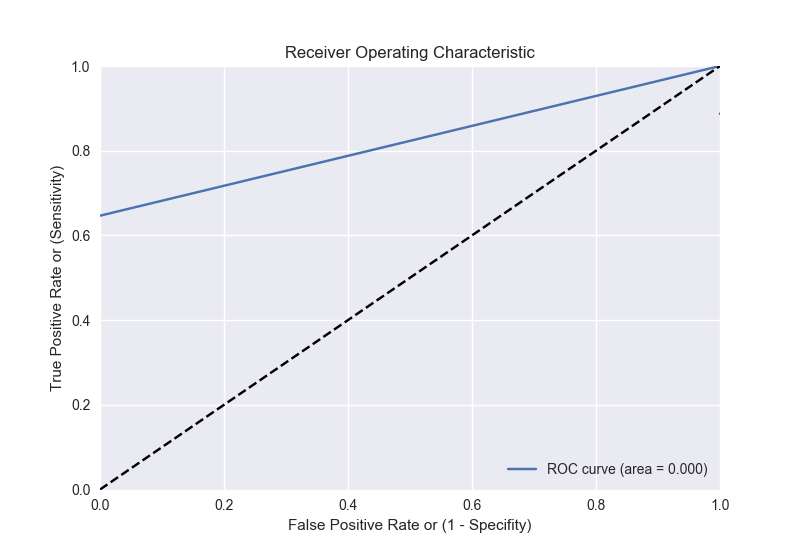

In [122]:
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

## 6.2 KNN (K-Nearest Neighbors)

In [123]:
X = df.drop('y', 1)
y = pd.get_dummies(df[['y']], drop_first = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [125]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print(accuracy_score(y_test, pred))

C:\Users\Nishu\Anaconda3\Lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


0.896941005098


In [146]:
neighbors = []
for i in range(1, 50, 2):
    neighbors.append(i)
print(neighbors)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]


In [ ]:
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    

In [157]:
accuracy = []

In [158]:
for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    score = (accuracy_score(y_test, pred))
    accuracy.append(score)

C:\Users\Nishu\Anaconda3\Lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [166]:
from matplotlib.pyplot import figure
%matplotlib inline

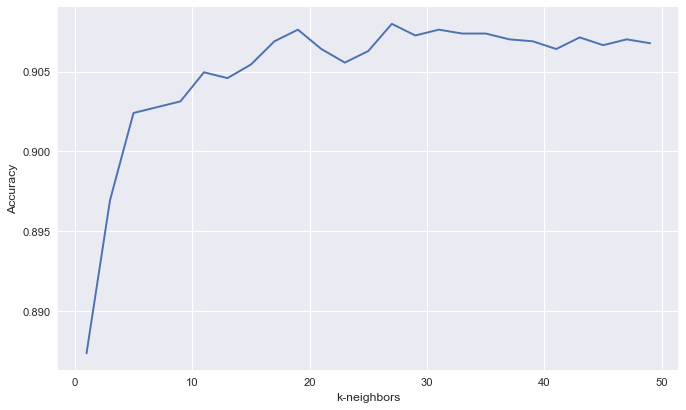

In [171]:
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(neighbors, accuracy)
plt.xlabel('k-neighbors')
plt.ylabel('Accuracy')
plt.show()

In [155]:
for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    print(str(i) + ' ---- '+ str((accuracy_score(y_test, pred))))

C:\Users\Nishu\Anaconda3\Lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


1 ---- 0.887351298859
3 ---- 0.896941005098
5 ---- 0.902403495994
7 ---- 0.902767662054
9 ---- 0.903131828114
11 ---- 0.904952658412
13 ---- 0.904588492353
15 ---- 0.905438213159
17 ---- 0.906894877397
19 ---- 0.907623209517
21 ---- 0.906409322651
23 ---- 0.905559601845
25 ---- 0.906287933965
27 ---- 0.907987375577
29 ---- 0.907259043457
31 ---- 0.907623209517
33 ---- 0.907380432144
35 ---- 0.907380432144
37 ---- 0.907016266084
39 ---- 0.906894877397
41 ---- 0.906409322651
43 ---- 0.907137654771
45 ---- 0.906652100024
47 ---- 0.907016266084
49 ---- 0.906773488711


**Note:** We see that accuracy is highest for neighbors '19' and '27'

In [194]:
max_score = 0
max_recall = 0
min_precision = math.inf

In [197]:
new_neighbors = []
for i in range(1, 30, 2):
    new_neighbors.append(i)
print(new_neighbors)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]


<div class = "alert alert-warning">

Retry for every dataframe individually....!

</div>

## 6.3 SVM

In [ ]:
SVM
	- kernel = “linear”, “rbf”,”poly” (default value is “rbf”)
	- C = 1, 10, 100, 1000
	- gamma = 0, 10, 100, 1000
	
	model = svm.svc(kernel='linear', c=1, gamma=1) 
	model.fit(X, y)
	model.score(X, y)
	predicted= model.predict(x_test)

In [64]:
from sklearn import svm
from sklearn.svm import SVC

In [67]:
X = df.drop('y', 1)
y = pd.get_dummies(df[['y']], drop_first = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [70]:
model = SVC(kernel='linear') 
model.fit(X_train, y_train.values.ravel())
pred = model.predict(X_test)

In [71]:
accuracy_score(y_test, pred)

0.88941490653071131

In [83]:
models = ['linear', 'rbf', 'poly']
C = [1, 10, 100, 1000]
gamma = [1, 10, 100, 1000]

In [84]:
best_accuracy = 0

In [ ]:
for m in models:
    for c in C:
        for g in gamma:
            model = SVC(kernel = m, C = c, gamma = g)
            model.fit(X_train, y_train.values.ravel())
            pred = model.predict(X_test)
            score = accuracy_score(y_test, pred)
            
            if best_accuracy < score:
                best_accuracy = score
                best_model = m
                best_C = c
                best_gamma = g


print("Best mdoel is " + m + " -- Best c is " + str(c) + " -- Best gamma is " + str(g) + " -- Best accuracy is " + str(score))

In [78]:
test_model = SVC(kernel='linear', gamma = 1) 

**Note**: 'numpy.ndarray' object has no attribute 'values'. If you have a numpy.ndarray, then use train_y.ravel() instead

## 6.4 Random Forests

In [72]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [74]:
rf = RandomForestClassifier(random_state = 42) 
model = rf.fit(X_train, y_train.values.ravel())

In [180]:
model.score(X_test,y_test)

0.90386016023306626

In [181]:
pred = model.predict(X_test)
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       0.93      0.97      0.95      7296
          1       0.63      0.39      0.48       942

avg / total       0.89      0.90      0.89      8238



In [ ]:
np.sum(predictions)

In [191]:
#ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

y_test_sorted = sorted(y_test.values)
y_pred_sorted = sorted(pred)

fpr, tpr, thresholds = (roc_curve(y_test_sorted, y_pred_sorted))
roc_auc = auc(y_test_sorted, y_pred_sorted)

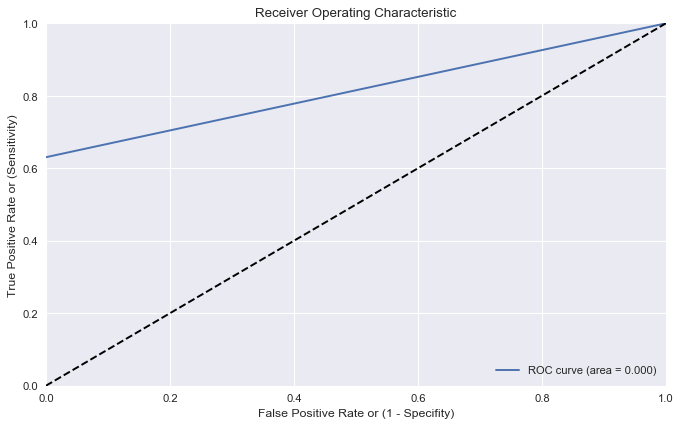

In [193]:
# Plot ROC curve
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

Random Forests has the following hyper parameters:

n_estimators = number of trees in the foreset <br>
max_features = max number of features considered for splitting a node <br>
max_depth = max number of levels in each decision tree <br>
min_samples_split = min number of data points placed in a node before the node is split <br>
min_samples_leaf = min number of data points allowed in a leaf node <br>
bootstrap = method for sampling data points (with or without replacement) <br>

### 6.3.1 GridSearchCV 

In [205]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint

In [206]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [207]:
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_split': 1e-07,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


### 6.3.2 RandomSearchCV

In [208]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

In [209]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [210]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [211]:
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 55.7min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 186.2min


In [ ]:
rf_random.best_params_